In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv('advertising.csv')
data.columns =[x.lower().strip() for x in data.columns]

In [3]:
data.head(3)

,daily time spent on site,age,area income,daily internet usage,ad topic line,city,male,country,timestamp,clicked on ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0


In [4]:
data = data.rename(columns = {'male' : 'gender'})
data.head(2)

,daily time spent on site,age,area income,daily internet usage,ad topic line,city,gender,country,timestamp,clicked on ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0


<AxesSubplot:>

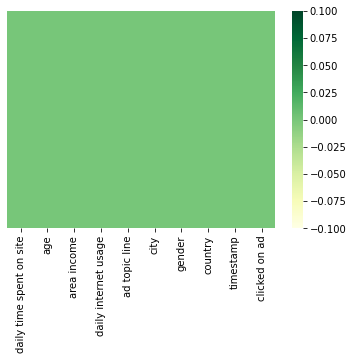

In [5]:
sns.heatmap(data.isnull(),yticklabels=False, cbar=True, cmap='YlGn')

In [6]:
data.duplicated().any()

False

In [7]:
data.describe()

,daily time spent on site,age,area income,daily internet usage,gender,clicked on ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [8]:
len(data[data['gender']==1])

481

In [9]:
a = len(data[data['clicked on ad']==1])
print("Total number of costumers are 1000")
print("The total number of costumers who clicked on add",a)
print("The percentage of people that have clicked on the adds is",(a*100)/100)
print("The percentage of costumers who have not clicked on the adds is",((1000-a)*100)/100)

Total number of costumers are 1000
The total number of costumers who clicked on add 500
The percentage of people that have clicked on the adds is 500.0
The percentage of costumers who have not clicked on the adds is 500.0


array([[<AxesSubplot:xlabel='daily time spent on site', ylabel='daily time spent on site'>,
        <AxesSubplot:xlabel='age', ylabel='daily time spent on site'>,
        <AxesSubplot:xlabel='area income', ylabel='daily time spent on site'>,
        <AxesSubplot:xlabel='daily internet usage', ylabel='daily time spent on site'>],
       [<AxesSubplot:xlabel='daily time spent on site', ylabel='age'>,
        <AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='area income', ylabel='age'>,
        <AxesSubplot:xlabel='daily internet usage', ylabel='age'>],
       [<AxesSubplot:xlabel='daily time spent on site', ylabel='area income'>,
        <AxesSubplot:xlabel='age', ylabel='area income'>,
        <AxesSubplot:xlabel='area income', ylabel='area income'>,
        <AxesSubplot:xlabel='daily internet usage', ylabel='area income'>],
       [<AxesSubplot:xlabel='daily time spent on site', ylabel='daily internet usage'>,
        <AxesSubplot:xlabel='age', ylabel='daily intern

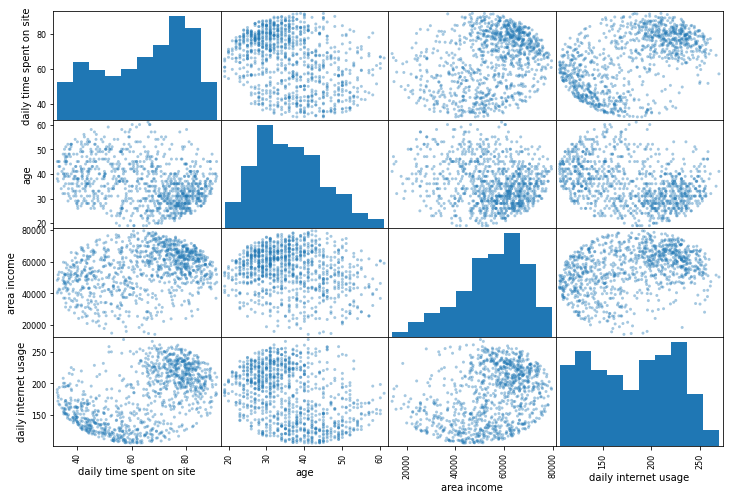

In [10]:
pd.plotting.scatter_matrix(data[['daily time spent on site', 'age','area income', 'daily internet usage']],alpha=0.4,figsize=[12,8])

<AxesSubplot:>

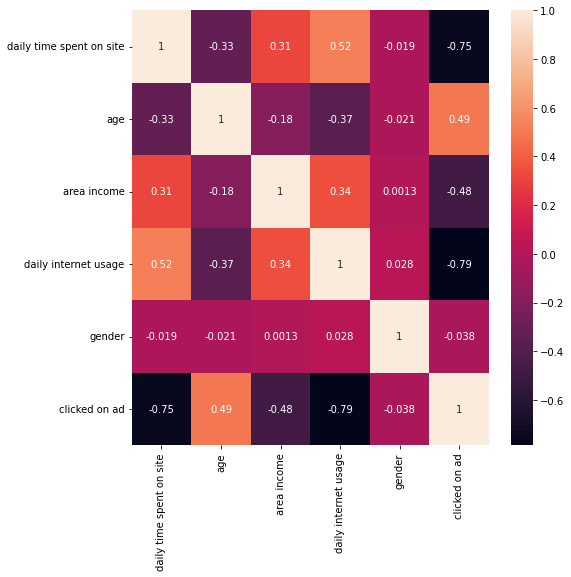

In [11]:
plt.figure(figsize=[8,8])
sns.heatmap(data.corr(),annot= True)

<AxesSubplot:xlabel='daily time spent on site', ylabel='area income'>

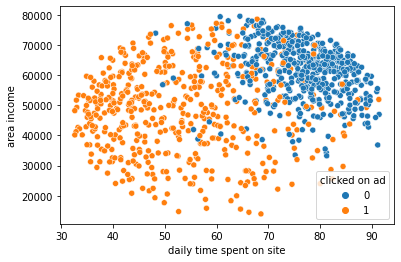

In [12]:
sns.scatterplot(x='daily time spent on site',y='area income',hue='clicked on ad',data = data)

<AxesSubplot:xlabel='daily internet usage', ylabel='daily time spent on site'>

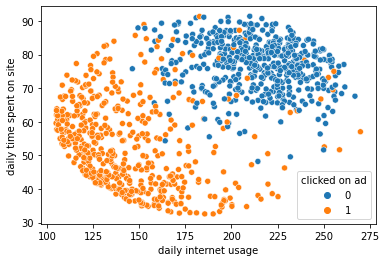

In [13]:
sns.scatterplot(x='daily internet usage',y='daily time spent on site',hue='clicked on ad',data = data)

# more usage of data i.e it means spending more time on the site causes costumers to overthink regarding products and it results
# in not clicking on the add

C:\Users\ydvis\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='daily time spent on site', ylabel='daily internet usage'>

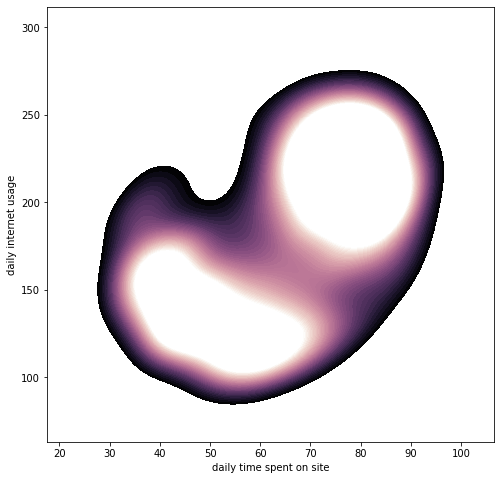

In [14]:
f, ax = plt.subplots(figsize=(8, 8))
cmap = sns.cubehelix_palette(as_cmap=True, start=0, dark=0, light=3, reverse=True)
sns.kdeplot(data["daily time spent on site"], data['daily internet usage'],cmap=cmap,n_levels=100, shade=True)

# it is clear that users who spend more time on the internet also spend more time on the site

In [15]:
data.columns

Index(['daily time spent on site', 'age', 'area income',
       'daily internet usage', 'ad topic line', 'city', 'gender', 'country',
       'timestamp', 'clicked on ad'],
      dtype='object')

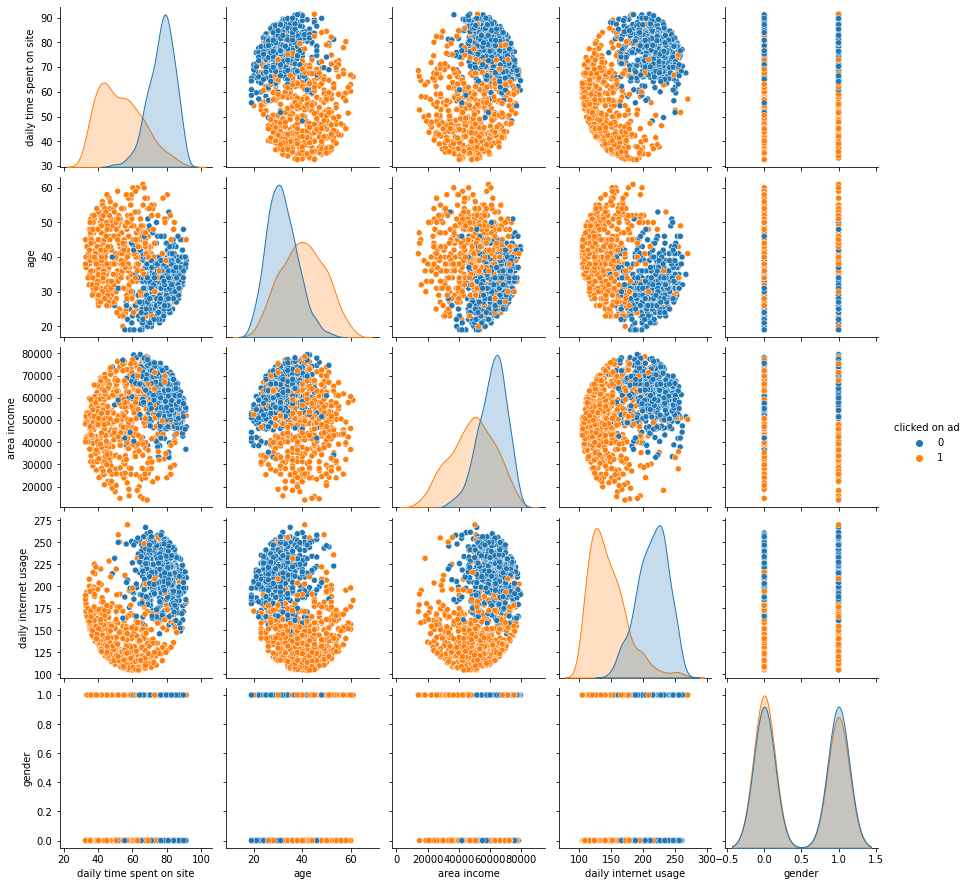

In [16]:
sns.pairplot(data,hue='clicked on ad',vars=['daily time spent on site', 'age', 'area income','daily internet usage', 'gender'])

C:\Users\ydvis\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


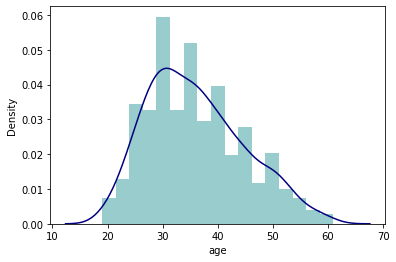

In [17]:
plt.figure()
sns.distplot(data['age'], hist_kws={'color': 'Teal'}, kde_kws={'color': 'Navy'});

# age has normal distribution over the data

C:\Users\ydvis\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2112: FutureWarning: Using `vertical=True` to control the orientation of the plot  is deprecated. Instead, assign the data directly to `y`. 
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='daily time spent on site'>

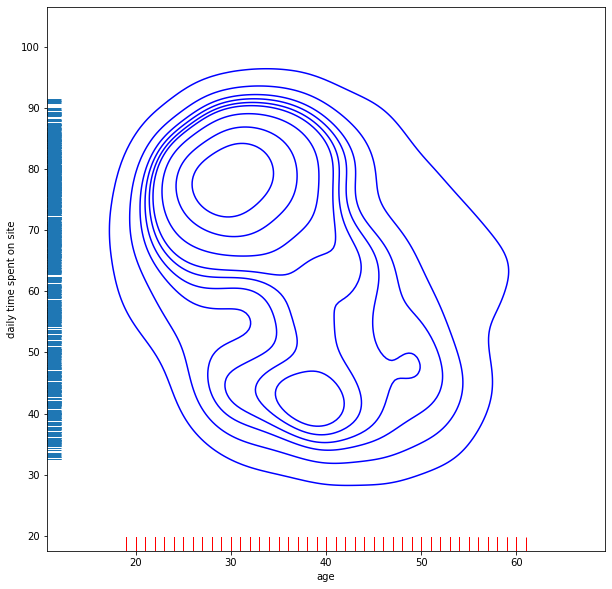

In [18]:
f, ax = plt.subplots(figsize=(10, 10))
sns.kdeplot(data.age, y=data['daily time spent on site'], color="b", ax=ax)
sns.rugplot(data.age, color="r", ax=ax)
sns.rugplot(data['daily time spent on site'], vertical=True, ax=ax)

# we can conclude that younger users spend more time on the site. This implies that users of the age between 20 and 40 years
# can be the main target group for the marketing campaign. And for middle-aged group people this site is good whereas for 60
# years age group it isn't best place to advertize

In [19]:
object_variables = ['ad topic line', 'city', 'country']
data[object_variables].describe(include=['O'])

,ad topic line,city,country
count,1000,1000,1000
unique,1000,969,237
top,Cloned 5thgeneration orchestration,Lisamouth,France
freq,1,3,9


In [20]:
pd.crosstab(index=data['country'], columns='count').sort_values(['count'], ascending=False).head(20)

col_0,count
country,
France,9
Czech Republic,9
Afghanistan,8
Australia,8
Turkey,8
South Africa,8
Senegal,8
Peru,8
Micronesia,8


In [21]:
data = data.drop(['ad topic line', 'city', 'country'], axis=1)
data.head(2)

,daily time spent on site,age,area income,daily internet usage,gender,timestamp,clicked on ad
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02,0


In [22]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

data['month'] = data['timestamp'].dt.month
data['day of the month'] = data['timestamp'].dt.day
data["day of the week"] = data['timestamp'].dt.dayofweek
data['hour'] = data['timestamp'].dt.hour
data = data.drop(['timestamp'], axis=1)

data.head(2)

,daily time spent on site,age,area income,daily internet usage,gender,clicked on ad,month,day of the month,day of the week,hour
0,68.95,35,61833.90,256.09,0,0,3,27,6,0
1,80.23,31,68441.85,193.77,1,0,4,4,0,1


In [23]:
object_variables = ['month', 'day of the month', 'day of the week','hour']
data[object_variables].describe()

,month,day of the month,day of the week,hour
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.817000,15.484000,3.064000,11.660000
std,1.926973,8.734073,1.998474,6.960952
min,1.000000,1.000000,0.000000,0.000000
25%,2.000000,8.000000,1.000000,6.000000
50%,4.000000,15.000000,3.000000,12.000000
75%,5.000000,23.000000,5.000000,18.000000
max,7.000000,31.000000,6.000000,23.000000


In [24]:
from sklearn.model_selection import train_test_split

X = data[['daily time spent on site', 'age', 'area income', 'daily internet usage',
    'gender', 'month', 'day of the month' ,'day of the week']]
y = data['clicked on ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [26]:
model_1 = LogisticRegression(C=0.01,solver='liblinear',random_state=42,max_iter=1000,multi_class='auto')
model_1.fit(X_train, y_train)
predictions_LR = model_1.predict(X_test)

print('Logistic regression accuracy:', accuracy_score(predictions_LR, y_test))
print('')
print('Confusion matrix:')
print(confusion_matrix(y_test,predictions_LR))

Logistic regression accuracy: 0.906060606060606

Confusion matrix:
[[158   4]
 [ 27 141]]


In [27]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(model_1,X,y,cv=3))

[0.91017964 0.89189189 0.90990991]


In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_LR))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       162
           1       0.97      0.84      0.90       168

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



In [29]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
lr_model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=lr_model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train,y_train)
# summarize results
print("Accuracy rate of Logistic Regression: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Accuracy rate of Logistic Regression: 0.974129 using {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


C:\Users\ydvis\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ydvis\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ydvis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [30]:
from sklearn.tree import DecisionTreeClassifier

model_2 = DecisionTreeClassifier()
model_2.fit(X_train, y_train)
predictions_DT = model_2.predict(X_test)

print('Decision tree accuracy:', accuracy_score(predictions_DT, y_test))
print('')
print('Confusion matrix:')
print(confusion_matrix(y_test,predictions_DT))

Decision tree accuracy: 0.9363636363636364

Confusion matrix:
[[152  10]
 [ 11 157]]


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [32]:
    pipeline1 = Pipeline((('log_reg',LogisticRegression()),))
    pipeline2 = Pipeline((('dtc',DecisionTreeClassifier()),))
    pipeline3 = Pipeline((('svm_model',SVC()),))
    pipeline4 = Pipeline((('knn',KNeighborsClassifier()),))
    pipeline5 = Pipeline((('gb',GaussianNB()),))
    pipeline6 = Pipeline((('rfc',RandomForestClassifier()),))
    pipeline7 = Pipeline((('mlp',MLPClassifier()),))
     
    parameter1 = {
        'log_reg__penalty' : ['l2'],
        'log_reg__C' : [0.01,0.1,0.5,1,2,3,5],
        'log_reg__random_state' : [0,42],
        'log_reg__solver' : ['lbfgs','liblinear','sag'],
        'log_reg__max_iter' : [10000,20000]
    }
    
    parameter2 = {
        'dtc__criterion' : ['gini','entropy'],
        'dtc__max_features' : ['auto','sqrt','log2'],
        'dtc__max_depth' : [2,3,4,5]
    }
    
    parameter3 = {
        'svm_model__kernel' : ['rbf','poly','sigmoid'],
        'svm_model__degree' : [2,3],
        'svm_model__gamma' :[0.5,1],
        'svm_model__C' : [0.5,1],
        'svm_model__decision_function_shape' : ['ovo','ovr']
    }
    
    parameter4 = {
        'knn__n_neighbors' : [3,4,5,6],
        'knn__weights' : ['uniform','distance'],
        'knn__algorithm' : ['auto','ball_tree','kd_tree'],
        'knn__metric' : ['minkowski']
    }
    
    parameter5 = {
        'gb__var_smoothing' : [1e-09]
        
    }
    
    parameter6 = {
        'rfc__n_estimators' : [110,120,150,180],
        'rfc__criterion' : ["gini", "entropy"],
        'rfc__max_features' : ["auto", "sqrt", "log2"],
    
    }
    
    parameter7 = {
        'mlp__activation' : ['logistic','tanh','relu'],
        'mlp__max_iter' : [10000],
        'mlp__solver' : ['lbfgs','sgd','adam'],
        'mlp__alpha' : [0.01,0.1,1],
        'mlp__learning_rate' : ['invscaling','adaptive'],
        'mlp__learning_rate_init' : [0.01,0.1,1]
    }
    classifier_name = ["Logistic Regression",'Decision Tree Classifier','SVM',"KNeighborsClassifier","GaussianNB","RandomForestClassifier","MLPClassifier"]
    para = [parameter1,parameter2,parameter4,parameter5,parameter6,parameter7]
    pip = [pipeline1,pipeline2,pipeline4,pipeline5,pipeline6,pipeline7]
    
    print("-----------STARTING GRID SEARCH------------ ")
    result = []
    for i in range(len(para)):
        gs = GridSearchCV(pip[i],para[i],scoring='accuracy',cv=3,verbose=4,refit=True,n_jobs=-1)
        gs.fit(X_train,y_train)
        print("******"+classifier_name[i]+"*******")
        print(gs.best_params_)
        print(gs.best_score_)
        print("----------------------------------------------------------------------------------------------------------------") 
        result.append(gs.best_score_)

-----------STARTING GRID SEARCH------------ 
Fitting 3 folds for each of 84 candidates, totalling 252 fits
******Logistic Regression*******
{'log_reg__C': 5, 'log_reg__max_iter': 10000, 'log_reg__penalty': 'l2', 'log_reg__random_state': 0, 'log_reg__solver': 'lbfgs'}
0.9194159726670937
----------------------------------------------------------------------------------------------------------------
Fitting 3 folds for each of 24 candidates, totalling 72 fits
******Decision Tree Classifier*******
{'dtc__criterion': 'gini', 'dtc__max_depth': 5, 'dtc__max_features': 'log2'}
0.9298059470424942
----------------------------------------------------------------------------------------------------------------
Fitting 3 folds for each of 24 candidates, totalling 72 fits
******SVM*******
{'knn__algorithm': 'auto', 'knn__metric': 'minkowski', 'knn__n_neighbors': 4, 'knn__weights': 'distance'}
0.7627522421524664
-----------------------------------------------------------------------------------------

In [38]:
data.head(2)

,daily time spent on site,age,area income,daily internet usage,gender,clicked on ad,month,day of the month,day of the week,hour
0,68.95,35,61833.90,256.09,0,0,3,27,6,0
1,80.23,31,68441.85,193.77,1,0,4,4,0,1


In [33]:

import pickle

In [45]:
new = data.copy()

In [44]:
# X = data[['daily time spent on site', 'age', 'area income', 'daily internet usage',
#     'gender', 'month', 'day of the month' ,'day of the week']]
model_1.predict([[68.95,35,61833.90,256.09,0,3,27,6]])

C:\Users\ydvis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [46]:
pickle.dump(new,open('add_final.pkl','wb'))